<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [ ]:
import urllib.request

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite"
filename = "m4_survey_data.sqlite"

urllib.request.urlretrieve(url, filename)

Connect to the database.


In [128]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [2]:
import pandas as pd

## Demo: How to run an sql query


In [3]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


## Demo: How to list all tables


In [4]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


## Demo: How to run a group by query


In [5]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78
5,20.0,109
6,21.0,203
7,22.0,406
8,23.0,581
9,24.0,679


## Demo: How to describe a table


In [6]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


In [7]:
# your code goes here
import matplotlib.pyplot as plt
import numpy as np

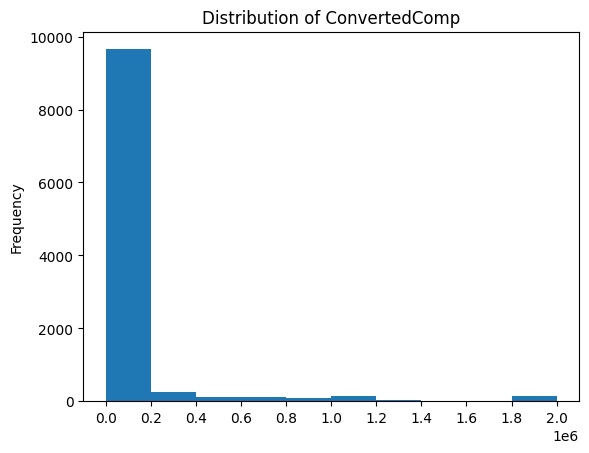

In [10]:
query1 = """SELECT ConvertedComp FROM master"""
df1 = pd.read_sql_query(query1, conn)

# Draw Histogram
bins_number = 10
comp_max = df1['ConvertedComp'].max()
comp_min = df1['ConvertedComp'].min()
comp_gap = comp_max - comp_min

plt.hist(df1['ConvertedComp'], bins=bins_number)
plt.ylabel('Frequency')
plt.title('Distribution of ConvertedComp')
plt.xticks(np.linspace(comp_min, comp_max, bins_number+1))
plt.show()


### Box Plots


Plot a box plot of `Age.`


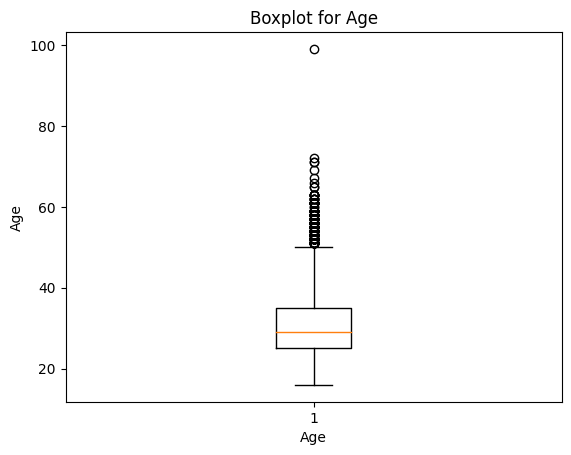

In [19]:
# your code goes here
query2 = """SELECT Age FROM master"""
data_age = pd.read_sql_query(query2, conn)

df2 = data_age.dropna()

plt.boxplot(df2)
plt.ylabel('Age')
plt.xlabel('Age')
plt.title('Boxplot for Age')

plt.show()
plt.show()

## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


In [30]:
df3['WorkWeekHrs'].describe()

count    11276.000000
mean        42.064606
std         24.672741
min          3.000000
25%         40.000000
50%         40.000000
75%         43.000000
max       1012.000000
Name: WorkWeekHrs, dtype: float64

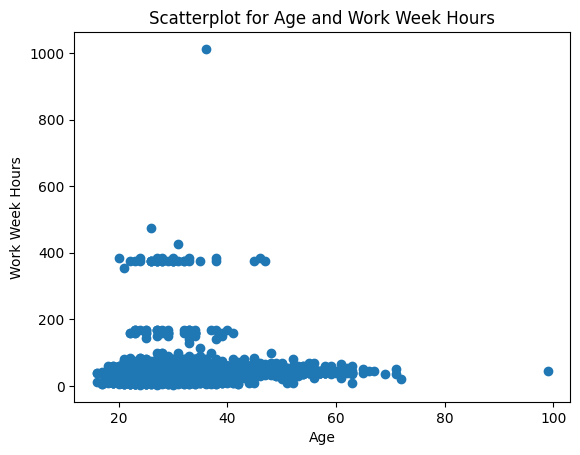

In [27]:
# your code goes here
query3 = """SELECT Age,WorkWeekHrs FROM master"""
data_scatter = pd.read_sql_query(query3, conn)

df3 = data_scatter

plt.scatter(df3['Age'],df3['WorkWeekHrs'])
plt.ylabel('Work Week Hours')
plt.xlabel('Age')
plt.title('Scatterplot for Age and Work Week Hours')

plt.show()


### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


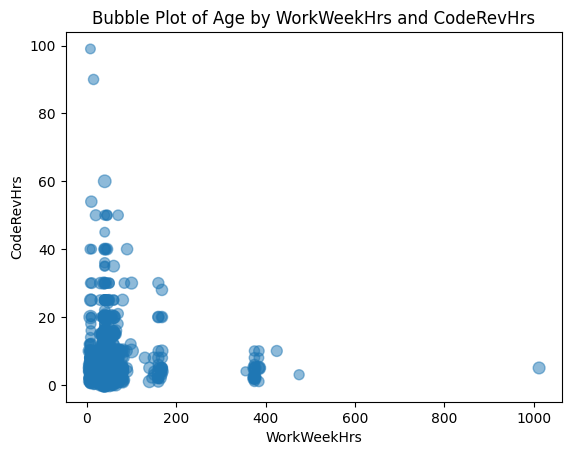

In [34]:
# your code goes here
query4 = """SELECT Age, WorkWeekHrs, CodeRevHrs FROM master"""
data_bubble = pd.read_sql_query(query4,conn)
df4 = data_bubble.dropna()

#plot the bubbles

#set bubbles sizes
bubble_size = df4['Age'] * 2

#create plot
plt.scatter(x=df4['WorkWeekHrs'],y=df4['CodeRevHrs'],s=bubble_size,alpha=0.5)
plt.xlabel('WorkWeekHrs')
plt.ylabel('CodeRevHrs')
plt.title('Bubble Plot of Age by WorkWeekHrs and CodeRevHrs')
plt.show()




## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


In [137]:
# your code goes here
queryrandom = """SELECT * FROM LanguageDesireNextYear """
data_random = pd.read_sql_query(queryrandom,conn)
df_random= pd.DataFrame(data_random['LanguageDesireNextYear'].value_counts())
df_random.reset_index(inplace=True)
df_random.sort_values(by='count',ascending=False)
df_random.head()

,LanguageDesireNextYear,count
0,JavaScript,6630
1,HTML/CSS,5328
2,Python,5239
3,SQL,5012
4,TypeScript,4088


In [129]:
# your code goes here
query5 = """SELECT * FROM DatabaseDesireNextYear """
data_pie = pd.read_sql_query(query5,conn)
df5= pd.DataFrame(data_pie['DatabaseDesireNextYear'].value_counts())

In [130]:

df5.reset_index(inplace=True)
df5.head()

,DatabaseDesireNextYear,count
0,PostgreSQL,4328
1,MongoDB,3649
2,Redis,3331
3,MySQL,3281
4,Elasticsearch,2856


In [131]:
df5_top = df5.sort_values(by='count', ascending=False).head()
df5_top
df5

,DatabaseDesireNextYear,count
0,PostgreSQL,4328
1,MongoDB,3649
2,Redis,3331
3,MySQL,3281
4,Elasticsearch,2856
5,Microsoft SQL Server,2706
6,SQLite,2437
7,Firebase,1650
8,MariaDB,1385
9,DynamoDB,1044


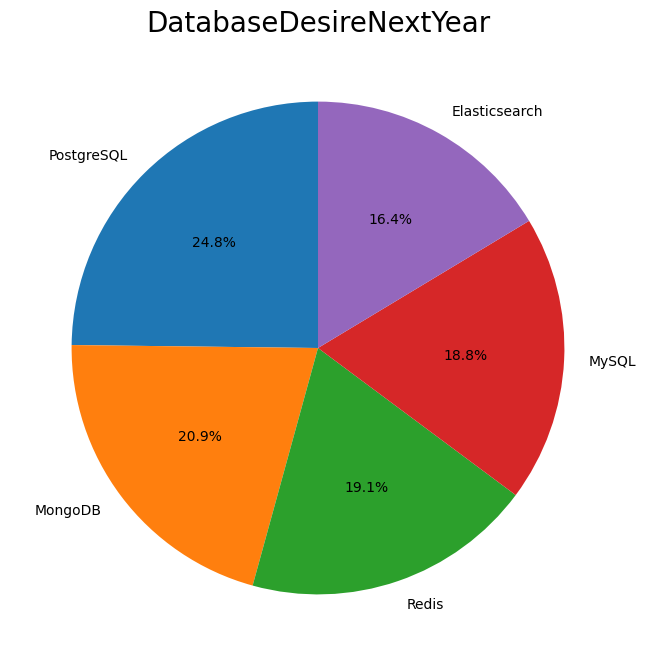

In [132]:


#plot piechart
labels = df5_top['DatabaseDesireNextYear']
sizes = df5_top['count']

fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(sizes, labels=labels, startangle=90, autopct='%1.1f%%')
ax.set_title('DatabaseDesireNextYear', fontsize=20)
plt.show()

### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


In [81]:
# your code goes here
query6 = """SELECT Age, WorkWeekHrs, CodeRevHrs FROM master WHERE Age BETWEEN 30 AND 35"""
data_stacked = pd.read_sql_query(query6,conn)


In [82]:
median_workweek = data_stacked.groupby('Age')['WorkWeekHrs'].median()
code_rev= data_stacked.groupby('Age')['CodeRevHrs'].median()

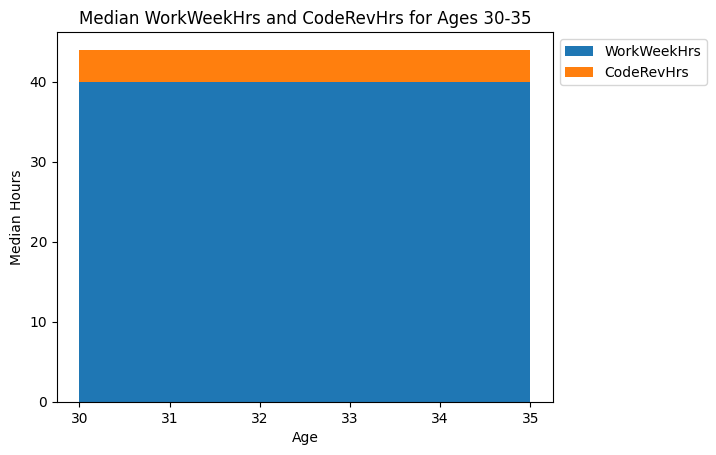

In [97]:
age_range = np.arange(30,36)
plt.stackplot(age_range, median_workweek,code_rev,labels=['WorkWeekHrs','CodeRevHrs'])
plt.legend(loc='upper left',bbox_to_anchor=(1, 1))
plt.title('Median WorkWeekHrs and CodeRevHrs for Ages 30-35')
plt.xlabel('Age')
plt.ylabel('Median Hours')
plt.show()

## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


In [109]:
# your code goes here
query7 = """SELECT Age, ConvertedComp FROM master WHERE Age BETWEEN 45 AND 60"""
data_line = pd.read_sql_query(query7,conn)
df7 = data_line.dropna()
df7.head()


,Age,ConvertedComp
0,47.0,103000.0
2,47.0,54996.0
3,47.0,62807.0
4,45.0,72522.0
5,45.0,54876.0


In [110]:
median_convertedcomp = df7.groupby('Age')['ConvertedComp'].median()

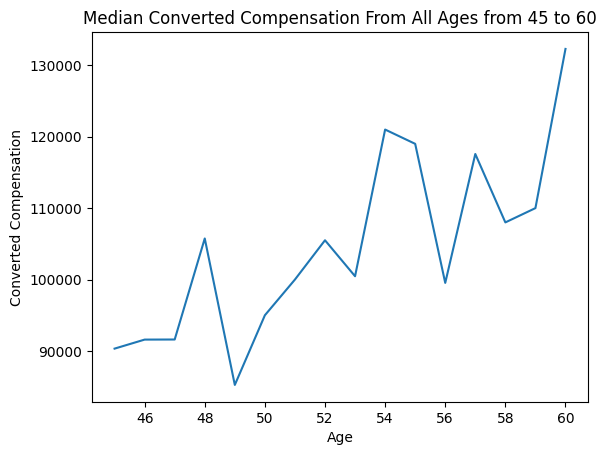

In [115]:
plt.plot(median_convertedcomp.index,median_convertedcomp)
plt.ylabel('Converted Compensation')
plt.xlabel('Age')
plt.title('Median Converted Compensation From All Ages from 45 to 60')
plt.show()

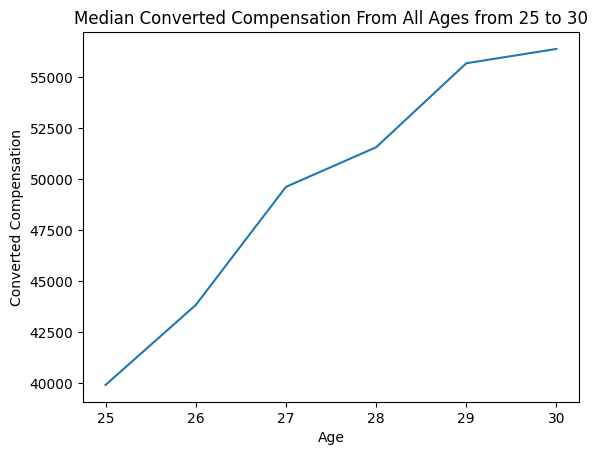

In [188]:
# your code goes here
query7a = """SELECT Age, ConvertedComp FROM master WHERE Age BETWEEN 25 AND 30"""
data_line = pd.read_sql_query(query7a,conn)
df7a = data_line.dropna()
median_convertedcomp_7a = df7a.groupby('Age')['ConvertedComp'].median()
plt.plot(median_convertedcomp_7a.index,median_convertedcomp_7a)
plt.ylabel('Converted Compensation')
plt.xlabel('Age')
plt.title('Median Converted Compensation From All Ages from 25 to 30')
plt.show()

### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


In [121]:
# your code goes here
query8 = """SELECT MainBranch FROM master"""
data_bar = pd.read_sql_query(query8,conn)
df8=data_bar.value_counts().to_frame()
df8.reset_index(inplace=True)
df8

,MainBranch,count
0,I am a developer by profession,10618
1,"I am not primarily a developer, but I write co...",780


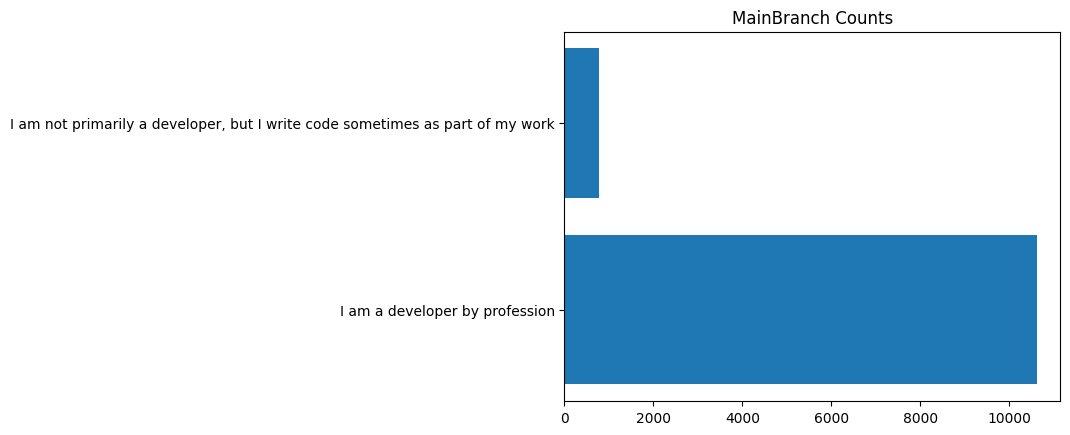

In [124]:
x=df8['MainBranch']
y=df8['count']
plt.barh(x,y)
plt.title('MainBranch Counts')
plt.show()

In [186]:
#How many respondents only work with MySQL
query10 = """SELECT DatabaseWorkedWith, count(Respondent)  
FROM DatabaseWorkedWith 
GROUP BY Respondent 
HAVING COUNT(DatabaseWorkedWith) = 1 
AND DatabaseWorkedWith ='MySQL'"""
df10 = pd.read_sql_query(query10,conn)
df10.value_counts()

DatabaseWorkedWith  count(Respondent)
MySQL               1                    474
Name: count, dtype: int64

In [146]:
#LanguageWorkedWith
query9 = """SELECT * FROM LanguageWorkedWith"""
df9 = pd.read_sql_query(query9,conn)
df9.head()
df9_group = df9['LanguageWorkedWith'].value_counts()
df9_group

LanguageWorkedWith
JavaScript               8687
HTML/CSS                 7830
SQL                      7106
Bash/Shell/PowerShell    4642
Python                   4542
Java                     4506
C#                       4288
TypeScript               3232
PHP                      2913
C++                      1946
C                        1578
Ruby                     1149
Go                       1114
Other(s):                 840
Kotlin                    751
Swift                     707
VBA                       628
R                         585
Objective-C               518
Scala                     492
Assembly                  437
Rust                      324
Dart                      237
Elixir                    187
Clojure                   164
F#                        158
WebAssembly               133
Erlang                     98
Name: count, dtype: int64

In [209]:
query11 = """SELECT DevType, Count(Respondent) FROM DevType
GROUP BY DevType"""
df11 = pd.read_sql_query(query11,conn)
df11.sort_values(by='Count(Respondent)',ascending=False)

,DevType,Count(Respondent)
11,"Developer, full-stack",6928
7,"Developer, back-end",6290
10,"Developer, front-end",3920
8,"Developer, desktop or enterprise applications",2575
13,"Developer, mobile",1959
5,DevOps specialist,1639
3,Database administrator,1413
23,System administrator,1202
4,Designer,988
6,"Developer, QA or test",911


In [203]:
df11['Employment']

0        Employed full-time
1        Employed full-time
2        Employed full-time
3        Employed full-time
4        Employed full-time
                ...        
11393    Employed full-time
11394    Employed full-time
11395    Employed full-time
11396    Employed full-time
11397    Employed full-time
Name: Employment, Length: 11398, dtype: object

Close the database connection.


In [125]:
conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
